In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [27]:
dataset = pd.read_csv('train.csv')

In [28]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [29]:
dataset.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001953,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [30]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [31]:
dataset['Gender'].fillna('Male', inplace=True)
dataset['Married'].fillna('Yes', inplace=True)
dataset['Self_Employed'].fillna('No', inplace=True)
dataset['LoanAmount'].fillna(dataset['LoanAmount'].median(), inplace=True)
dataset['Credit_History'].fillna(2, inplace=True)
dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mean(), inplace=True)

In [32]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


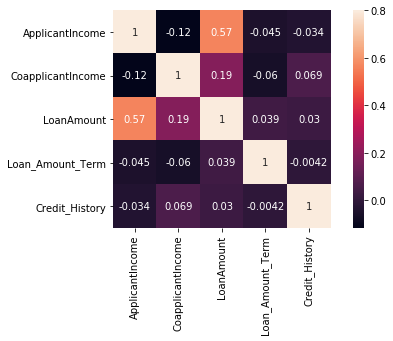

In [33]:
corrmat=dataset.corr()
fig=plt.figure(figsize=(8,4))
sns.heatmap(corrmat,vmax=.8, square= True,annot=True)
plt.show()

In [34]:
dataset=dataset.drop('Loan_ID',axis=1)

In [35]:
dataset['Dependents']=dataset['Dependents'].astype(object)

In [36]:
dataset['Very_Short_Term'] = dataset['Loan_Amount_Term'].map(lambda t: 1 if t<=60 else 0)
dataset['Short_Term'] = dataset['Loan_Amount_Term'].map(lambda t: 1 if t>60 and t<180 else 0)
dataset['Long_Term'] = dataset['Loan_Amount_Term'].map(lambda t: 1 if t>=180 and t<=300  else 0)
dataset['Very_Long_Term'] = dataset['Loan_Amount_Term'].map(lambda t: 1 if t>300 else 0)
dataset.drop('Loan_Amount_Term', axis=1, inplace=True)

In [37]:
dataset['Credit_History_Bad'] = dataset['Credit_History'].map(lambda c: 1 if c==0 else 0)
dataset['Credit_History_Good'] = dataset['Credit_History'].map(lambda c: 1 if c==1 else 0)
dataset['Credit_History_Unknown'] = dataset['Credit_History'].map(lambda c: 1 if c==2 else 0)
dataset.drop('Credit_History', axis=1, inplace=True)

In [38]:
dataset=pd.get_dummies(dataset,drop_first=True)

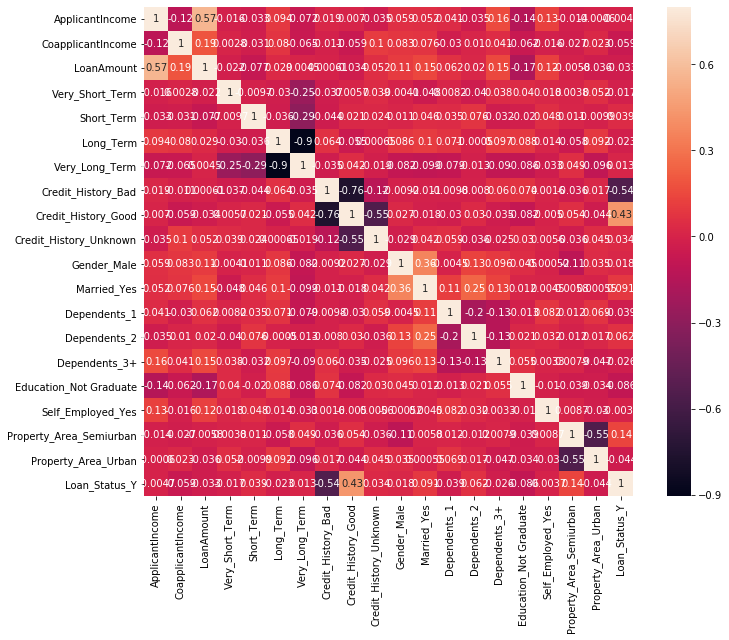

In [14]:
corrmat=dataset.corr()
fig=plt.figure(figsize=(12,9))
sns.heatmap(corrmat,vmax=.8, square= True,annot=True)
plt.show()

In [39]:
dataset.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Very_Short_Term,Short_Term,Long_Term,Very_Long_Term,Credit_History_Bad,Credit_History_Good,Credit_History_Unknown,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,128.0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,0,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1


In [40]:
dataset.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Very_Short_Term',
       'Short_Term', 'Long_Term', 'Very_Long_Term', 'Credit_History_Bad',
       'Credit_History_Good', 'Credit_History_Unknown', 'Gender_Male',
       'Married_Yes', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Status_Y'],
      dtype='object')

In [41]:
cols=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Gender_Male',
       'Married_Yes', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban', 
       'Very_Short_Term', 'Short_Term', 'Long_Term', 'Very_Long_Term',
       'Credit_History_Bad', 'Credit_History_Good', 'Credit_History_Unknown','Loan_Status_Y',]

In [42]:
df=pd.DataFrame(dataset,columns=cols)

In [43]:
df.isnull().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Gender_Male                0
Married_Yes                0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Not Graduate     0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
Very_Short_Term            0
Short_Term                 0
Long_Term                  0
Very_Long_Term             0
Credit_History_Bad         0
Credit_History_Good        0
Credit_History_Unknown     0
Loan_Status_Y              0
dtype: int64

In [44]:
X = df.iloc[:,:-1].values
y = df['Loan_Status_Y'].values

In [47]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
parameters ={"learning_rate"    : [ 0.1,0.20,0.30 ] ,
             "max_depth"        : [ 6,7 ],
             #"min_child_weight" : [ 1, 3, 5, 7 ],
             "gamma"            : [ 0.0],
             #"colsample_bytree" : [ 0.5,1],
             "random_state"     : [1,2,3,4]}
classifier = XGBClassifier(n_estimators=30)
grid_search = GridSearchCV(estimator=classifier,
                           param_grid=parameters,
                           scoring='accuracy',
                           cv=10,
                           n_jobs=1)
model = grid_search.fit(X, y)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

In [21]:
from xgboost import XGBClassifier
classifier= XGBClassifier(n_estimators=30, max_depth=6,learning_rate=0.1,gamma=0,random_state=1)
classifier.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=30, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [48]:
print(best_parameters)
print(best_accuracy)

{'gamma': 0.0, 'learning_rate': 0.1, 'max_depth': 6, 'random_state': 1}
0.7801302931596091


In [49]:
y_pred=model.predict(X)

In [50]:
from sklearn import metrics
metrics.accuracy_score(y_pred, y)

0.8664495114006515

In [51]:
df=pd.read_csv('test.csv')

In [52]:
df2=pd.DataFrame()
df2['Loan_ID']=df['Loan_ID']
df=df.drop('Loan_ID',axis=1)

In [53]:
df['Gender'].fillna('Male', inplace=True)
df['Married'].fillna('Yes', inplace=True)
df['Self_Employed'].fillna('No', inplace=True)
df['LoanAmount'].fillna(dataset['LoanAmount'].median(), inplace=True)
df['Credit_History'].fillna(2, inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)

In [54]:
df['Dependents']=df['Dependents'].astype(object)

In [55]:
df['Very_Short_Term'] = df['Loan_Amount_Term'].map(lambda t: 1 if t<=60 else 0)
df['Short_Term'] = df['Loan_Amount_Term'].map(lambda t: 1 if t>60 and t<180 else 0)
df['Long_Term'] = df['Loan_Amount_Term'].map(lambda t: 1 if t>=180 and t<=300  else 0)
df['Very_Long_Term'] = df['Loan_Amount_Term'].map(lambda t: 1 if t>300 else 0)
df.drop('Loan_Amount_Term', axis=1, inplace=True)

In [56]:
df['Credit_History_Bad'] = df['Credit_History'].map(lambda c: 1 if c==0 else 0)
df['Credit_History_Good'] = df['Credit_History'].map(lambda c: 1 if c==1 else 0)
df['Credit_History_Unknown'] = df['Credit_History'].map(lambda c: 1 if c==2 else 0)
df.drop('Credit_History', axis=1, inplace=True)

In [57]:
df=pd.get_dummies(df,drop_first=True)

In [58]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Very_Short_Term,Short_Term,Long_Term,Very_Long_Term,Credit_History_Bad,Credit_History_Good,Credit_History_Unknown,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1
1,3076,1500,126.0,0,0,0,1,0,1,0,1,1,1,0,0,0,0,0,1
2,5000,1800,208.0,0,0,0,1,0,1,0,1,1,0,1,0,0,0,0,1
3,2340,2546,100.0,0,0,0,1,0,0,1,1,1,0,1,0,0,0,0,1
4,3276,0,78.0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1


In [59]:
cols=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Gender_Male',
       'Married_Yes', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban', 
       'Very_Short_Term', 'Short_Term', 'Long_Term', 'Very_Long_Term',
       'Credit_History_Bad', 'Credit_History_Good', 'Credit_History_Unknown']

In [60]:
df=pd.DataFrame(df,columns=cols)

In [61]:
X=df.iloc[:,:].values

In [62]:
df2['Loan_Status']=grid_search.predict(X)
df2.to_csv('sub.csv',index=False)

In [63]:
df2['Loan_Status'] = df2['Loan_Status'].map({1:'Y', 0:'N'}).astype(str)

In [64]:
df2.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [65]:
df2.to_csv('final.csv',index=False)